In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import jn 

In [9]:
def BeatSignal(t, Δ, ωm, ϕ, C, δ, Γ):
    a = C/(Γ**2+ωm**2)
    Ln = lambda n: Γ**2/(Γ**2 + (Δ-n*ωm)**2)
    Dn = lambda n: Γ*(Δ-n*ωm)/(Γ**2 + (Δ-n*ωm)**2)
    res = 0
    for n in range(-100,101,1):
        res += jn(n, δ)*jn(n-1,δ) * (\
        (Ln((n+1)/2)+Ln((n-2)/2)) * np.cos(ωm*t+ϕ) + 
        (Dn((n+1)/2)+Dn((n-2)/2)) * np.sin(ωm*t+ϕ) )
    return a*res

In [18]:
t = np.linspace(0,1e-6,201)
beat = BeatSignal(t, 0, 2*np.pi*2e6, 0.5*np.pi, 1, 0.8, 2*np.pi*1e6)

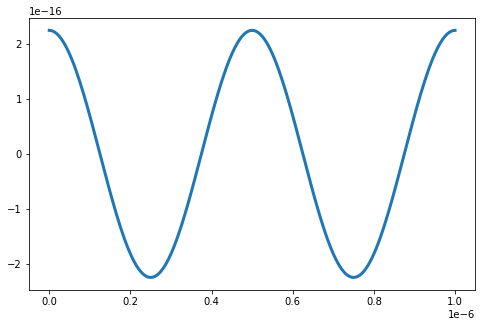

In [40]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(t, beat, lw = 3)

In [31]:
def BeatSignalIQ(Δ, ωm, C, δ, Γ):
    """
    Assumes δ<1 and only considers 1st order sidebands
    """
    a = C/(Γ**2+ωm**2)
    Ln = lambda n: Γ**2/(Γ**2 + (Δ-n*ωm)**2)
    Dn = lambda n: Γ*(Δ-n*ωm)/(Γ**2 + (Δ-n*ωm)**2)
    inphase = jn(1, δ)*jn(0,δ) * (\
           Ln(-1)-Ln(-1/2)+Ln(1/2)-Ln(1) )
    quad = jn(1, δ)*jn(0,δ) * (\
              Dn(1) - Dn(1/2) - Dn(-1/2) + Dn(-1) )
    return inphase, quad

In [44]:
Γ = 2*np.pi*1e6
Δ = np.linspace(-10,10,501)*Γ
ωm = 1*Γ
C = 1
δ = 0.8
I,Q = BeatSignalIQ(Δ, ωm, C, δ, Γ)

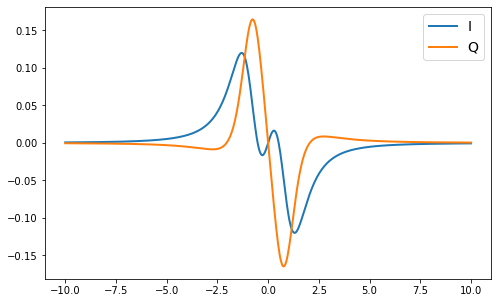

In [45]:
fig, ax = plt.subplots(figsize = (8,5))
ax.plot(Δ/Γ, I, lw = 2, label = 'I')
ax.plot(Δ/Γ, Q, lw = 2, label = 'Q')
ax.legend(fontsize = 14)